In [67]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
kalamazoo_president = pd.read_csv('./kalamazoo-president.txt')
kalamazoo_straight_party = pd.read_csv('./kalamazoo-straight-party.txt')
kalamazoo_house = pd.read_csv('./kalamazoo-house.txt')
kalamazoo_president_2016 = pd.read_csv('./2016-kalamazoo-president.txt')
kalamazoo_house_2016 = pd.read_csv('./2016-kalamazoo-house.txt')

In [70]:
kalamazoo_president_2016['total_votes'] = (
    kalamazoo_president_2016['rep'] +
    kalamazoo_president_2016['dem'] +
    kalamazoo_president_2016['lib'] +
    kalamazoo_president_2016['ust'] +
    kalamazoo_president_2016['grn'] +
    kalamazoo_president_2016['nlp'] +
    kalamazoo_president_2016['w1'] +
    kalamazoo_president_2016['w2'] +
    kalamazoo_president_2016['w3'] +
    kalamazoo_president_2016['w4'] +
    kalamazoo_president_2016['w5'] +
    kalamazoo_president_2016['w6'] +
    kalamazoo_president_2016['w7']
)

kalamazoo_president_2016['trump_vote_percentage'] = kalamazoo_president_2016['rep'] / kalamazoo_president_2016['total_votes']

In [71]:
kalamazoo_house_2016['total_votes'] = (
    kalamazoo_house_2016['rep'] +
    kalamazoo_house_2016['dem'] +
    kalamazoo_house_2016['lib'] +
    kalamazoo_house_2016['wi']
)

kalamazoo_house_2016['percentage_republican'] = kalamazoo_house_2016['rep'] / kalamazoo_house_2016['total_votes']

In [72]:
kalamazoo_house['total_votes'] = (
    kalamazoo_house['dem'] +
    kalamazoo_house['rep'] +
    kalamazoo_house['lib'] +
    kalamazoo_house['grn'] +
    kalamazoo_house['non'] +
    kalamazoo_house['w1']
)

kalamazoo_house['percentage_republican'] = kalamazoo_house['rep'] / kalamazoo_house['total_votes']

In [73]:
kalamazoo_straight_party['sp_total'] = (
    kalamazoo_straight_party['dem'] +
    kalamazoo_straight_party['rep'] +
    kalamazoo_straight_party['lib'] +
    kalamazoo_straight_party['ust'] +
    kalamazoo_straight_party['wcp'] +
    kalamazoo_straight_party['grn'] +
    kalamazoo_straight_party['nlp']
)

kalamazoo_straight_party['percentage_republican'] = kalamazoo_straight_party['rep'] / kalamazoo_straight_party['sp_total']

In [74]:
kalamazoo_president['total_votes'] = (
  kalamazoo_president['biden'] +
  kalamazoo_president['trump'] +
  kalamazoo_president['jorgensen'] +
  kalamazoo_president['blankenship'] +
  kalamazoo_president['hawkins'] +
  kalamazoo_president['de_la_fuente'] +
  kalamazoo_president['w1'] +
  kalamazoo_president['w2'] +
  kalamazoo_president['w3'] +
  kalamazoo_president['w4'] +
  kalamazoo_president['w5'] +
  kalamazoo_president['w6']
)

kalamazoo_president['trump_vote_percentage'] = kalamazoo_president['trump'] / kalamazoo_president['total_votes']

In [87]:
straight_republican_percentage = kalamazoo_straight_party['percentage_republican'].tolist()
house_republican_percentage = kalamazoo_house['percentage_republican']
house_republican_percentage_2016 = kalamazoo_house_2016['percentage_republican']
trump_relative_performance_2016 = (kalamazoo_president_2016['trump_vote_percentage'] - kalamazoo_house_2016['percentage_republican'])
trump_relative_performance = (kalamazoo_president['trump_vote_percentage'] - kalamazoo_house['percentage_republican']).tolist()

slope_points_x = []
slope_points_y = []

for index, value in enumerate(house_republican_percentage_2016):
    if value > 0.2:
        slope_points_x.append(value)
        slope_points_y.append(trump_relative_performance[index])

m, b = np.polyfit(slope_points_x, slope_points_y, 1)
x = np.array(slope_points_x)

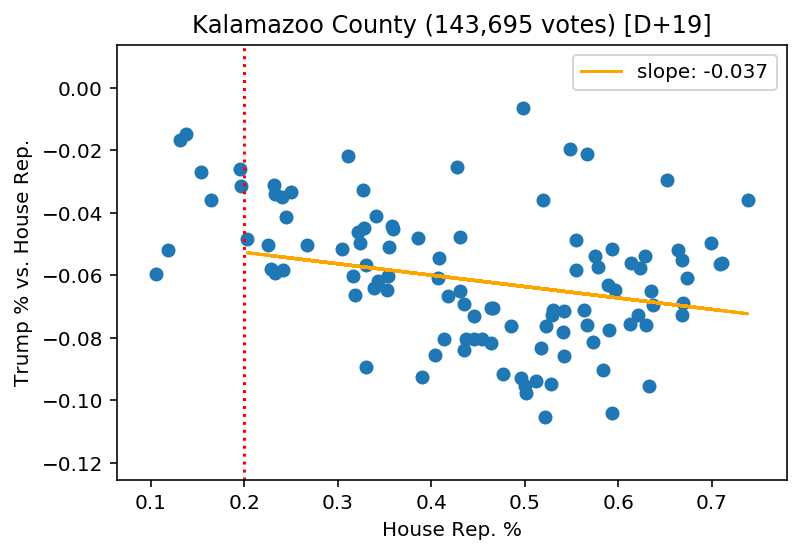

In [90]:
plt.scatter(
    house_republican_percentage,
    trump_relative_performance
)

plt.xlabel('House Rep. %')
plt.ylabel('Trump % vs. House Rep.')
plt.axvline(x=0.2, color='red', linestyle='dotted')

plt.plot(x, m*x + b, color='orange', label=f'slope: {round(m, 3)}')
plt.legend(loc=0)

plt.title('Kalamazoo County (143,695 votes) [D+19]')

plt.show()